# Classificação e Regressão.

#### Importando bibliotecas

In [56]:
import pandas as pd
import numpy as np

# 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Separação dos Dados entre treino e teste
from sklearn.model_selection import train_test_split

# Análise dos Erros
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# graficos
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Mensagens
import warnings
warnings.filterwarnings('ignore')


#### Lendo arquivo CSV

In [35]:
dados = pd.read_csv("FuelConsumptionCo2.csv")

#### Nomes das features do dataset.

In [36]:
dados.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

#### Verificando campos nulos.

In [37]:
dados.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

#### Tipos de dados de cada features.

In [38]:
dados.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

#### Ultimas 5 amostras.

In [39]:
dados.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


### 1. Exibir a Matriz de Correlação entre as variáveis 

Analisando Correlação


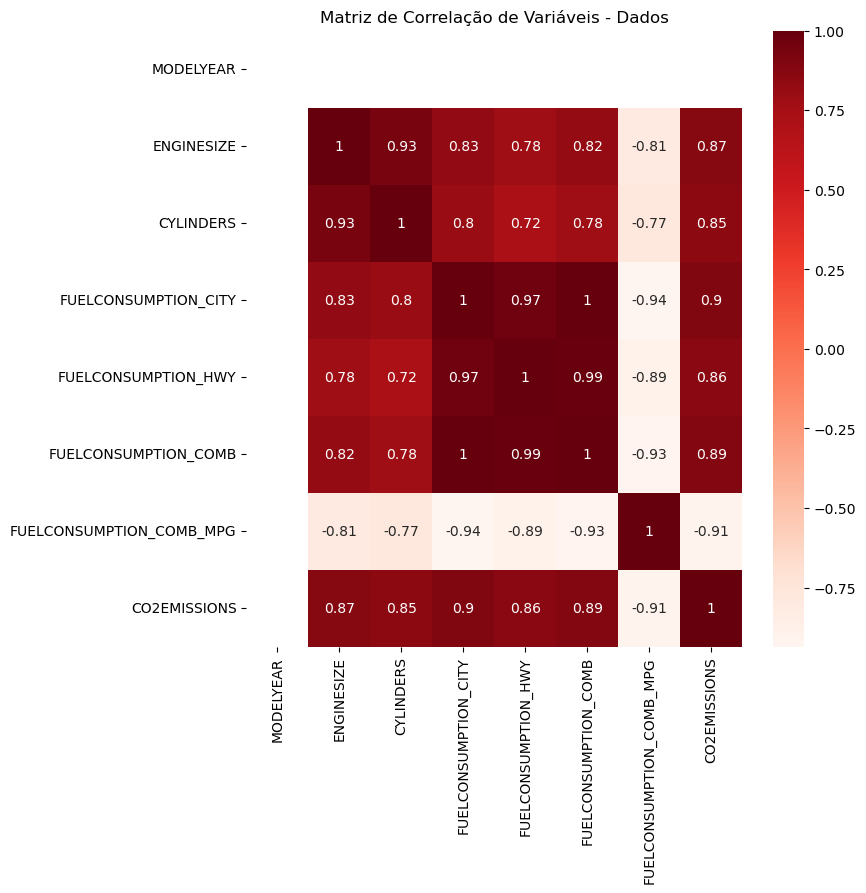

In [40]:
print("="*50)
print("Analisando Correlação")
plt.figure(figsize = (8,8))
sns.heatmap(dados.corr(), annot = True, cmap = 'Reds')
plt.title(f"Matriz de Correlação de Variáveis - Dados")
plt.show()

### 2. Executar um algoritmo para realizar a Seleção de Features mais relevantes para o modelo

In [41]:
dados2 = dados[['CO2EMISSIONS','FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_COMB', 'ENGINESIZE', 'FUELCONSUMPTION_HWY']]
dados2.tail()

,CO2EMISSIONS,FUELCONSUMPTION_COMB_MPG,FUELCONSUMPTION_COMB,ENGINESIZE,FUELCONSUMPTION_HWY
1062,271,24,11.8,3.0,9.8
1063,264,25,11.5,3.2,9.5
1064,271,24,11.8,3.0,9.8
1065,260,25,11.3,3.2,9.3
1066,294,22,12.8,3.2,10.2


In [42]:
dados3 = dados[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
dados3.tail()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260
1066,3.2,6,12.8,294


### 3. Atualize os nomes das seguintes colunas para facilitar a identificação no modelo

In [44]:
dados2 = dados2.rename(columns={ 'CO2EMISSIONS':'EMISSÃO_CO2', 'FUELCONSUMPTION_COMB_MPG':'FUELCONSCOMBMPG','FUELCONSUMPTION_COMB':'FUELCONSCOMB','ENGINESIZE':'TAM_MOTOR', 'FUELCONSUMPTION_HWY':'FUELCONSHWY'})
dados2.sample(3)

,EMISSÃO_CO2,FUELCONSCOMBMPG,FUELCONSCOMB,TAM_MOTOR,FUELCONSHWY
1007,373,17,16.2,5.7,13.9
699,283,23,12.3,3.7,10.0
595,255,25,11.1,2.4,10.3


In [45]:
dados3 = dados3.rename(columns={ 'FUELCONSUMPTION_COMB':'FUELCONSCOMB'})
dados3.sample(3)

,ENGINESIZE,CYLINDERS,FUELCONSCOMB,CO2EMISSIONS
934,2.4,4,9.9,228
788,1.6,4,8.7,200
628,2.0,4,8.8,202


### 4. Crie um novo dataframe com as features mais relevantes

In [47]:
dados2.sample(3)

,EMISSÃO_CO2,FUELCONSCOMBMPG,FUELCONSCOMB,TAM_MOTOR,FUELCONSHWY
34,288,23,12.5,4.0,9.7
521,244,27,10.6,2.4,9.3
638,225,29,9.8,2.0,7.9


In [48]:
dados3.sample(3)

,ENGINESIZE,CYLINDERS,FUELCONSCOMB,CO2EMISSIONS
249,1.8,4,8.3,191
50,5.2,10,15.4,354
861,1.6,4,6.6,152


### 5. Análises

#### 5.1. Separe os dados de treino e teste.

In [66]:
# Separando as colunas de interesse
X = np.asarray([dados3['CYLINDERS']])
y = np.asarray([dados3['CO2EMISSIONS']])

X_train, X_test, y_train, y_test = train_test_split(X.T, y.T, test_size = 0.2, random_state = 42)

#### 5.2. Import sklearn library.

In [60]:
# Importada no inicio do documento Jutyter Notebook

#### 5.3. Crie a variável com o modelo de Regressão Linear.

In [67]:
lr = LinearRegression()

#### 5.4. Separe os dados de treino e teste.

In [68]:
# Treinar Modelo
lr.fit(X_train, y_train)

LinearRegression()

#### 5.5. Separe as Features de Treino e Teste.

In [69]:
# Predição dos dados de Teste
y_pred = lr.predict(X_test)

#### 5.6. Rode o Modelo.

In [71]:
# Verificação dos Erros
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Calcular o R Squared
r2 = r2_score(y_test, y_pred)

# Print dos Valores
print("MSE Value:", round(mse, 2) )
print("RMSE value:", round(rmse, 2) )
print("R2 value:", round(r2, 2) )

MSE Value: 1109.35
RMSE value: 33.31
R2 value: 0.73


#### 5.7. Defina os valores para os coeficientes Theta 0: Intercepto e Theta 1: Coeficiente.

#### 5.8. Plot o Gráfico de Regressão Linear com a Reta Ajustada.

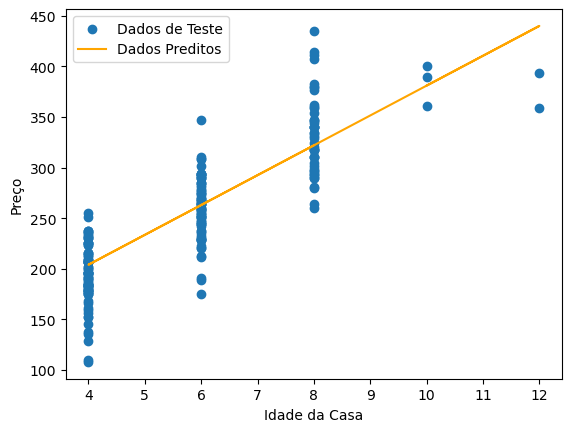

In [72]:
#pylab.rcParams.update(params)
plt.scatter(X_test, y_test, label = "Dados de Teste")
plt.plot(X_test, y_pred, c = "orange", label = "Dados Preditos")
plt.xlabel("Idade da Casa")
plt.ylabel("Preço")
plt.legend()
plt.show()

### 6. Defina um Baseline para que sirva de comparação

### 7. Encontre o Melhor ajuste (R2-Score) e o Erro Médio Quadrático (SME e RMSE)

#### 7.1.  Rode mais de um modelo para obter o melhor ajuste.

### 8. Com base no algoritmo de Regressão Linear Simples, elabore outro um algoritmo de Regressão Linear Múltipla e compare a performance entre os dois Modelos.